<a href="https://colab.research.google.com/github/psukphranee/Machine-Learning-Projects/blob/master/Hands-On%20Machine%20Learning/Chapter%203%3A%20Classification/MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Classification

# Get data and look at a sample

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

In [2]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
X, y = mnist.data, mnist.target


In [4]:
import numpy as np

y = y.astype(np.uint8)

In [5]:
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]   

In [6]:
some_sample = X_train[0]
some_sample_img = some_sample.reshape(28,28);

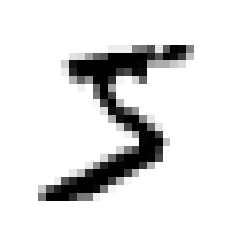

In [7]:
import matplotlib.pyplot as plt

plt.imshow(some_sample_img, cmap='binary')
plt.axis('off')
plt.show()

In [8]:
y[5]

2

## Train a binary classifier: 5 vs non-5

In [9]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state=42)

In [10]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

In [11]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [12]:
y_train_5.shape
sum(y_train_5)

5421

In [13]:
sgd.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [14]:
sgd.predict([some_sample])

array([ True])

In [15]:
from sklearn.model_selection import cross_val_predict

y_train_predict = cross_val_predict(sgd, X_train, y_train_5, cv=3)

In [16]:
y_train_predict.shape

(60000,)

In [17]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_predict)

array([[53892,   687],
       [ 1891,  3530]])

In [18]:
confusion_matrix(y_train_5, y_train_5)

array([[54579,     0],
       [    0,  5421]])

In [19]:
y_scores = cross_val_predict(sgd, X_train, y_train_5, cv=3, method='decision_function')

In [20]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_train_5, y_scores)


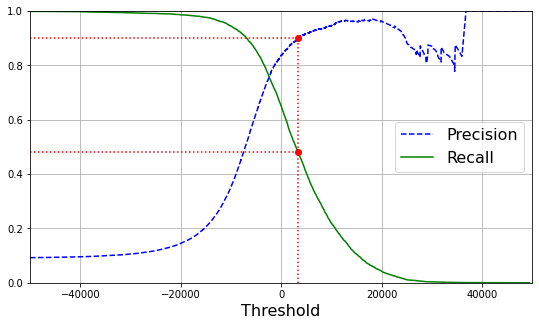

In [42]:
def plot_precision_recall(precision, recall, thresholds):
  plt.plot(thresholds, precision[:-1], 'b--', label="Precision")
  plt.plot(thresholds, recall[:-1], 'g-', label="Recall")
  plt.legend(loc="center right", fontsize=16) # Not shown in the book
  plt.xlabel("Threshold", fontsize=16)        # Not shown
  plt.grid(True)                              # Not shown
  plt.axis([-50000, 50000, 0, 1])

plt.figure(figsize=(9,5))
plot_precision_recall(precision, recall, thresholds)


recall_90 = recall[np.argmax(precision >= .9)] #threshold value where precision first >= .9
threshold_90 = thresholds[np.argmax(precision >= .9)] #threshold value where precision first >= .9

#plot 90pct markers
plt.plot([threshold_90, threshold_90], [recall_90, 0.9], 'ro')

plt.plot([threshold_90, threshold_90], [0., 0.9], "r:")
plt.plot([-50000, threshold_90], [0.9, 0.9], "r:")
plt.plot([-50000, threshold_90], [recall_90, recall_90], "r:")

plt.show()

In [39]:
recall_90

0.4799852425751706

In [23]:
np.argmax(precision >= .9)

57075